# Plant Leaf Classification

Applying machine learning models for classification of plant leaf images

### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import os
import string
import matplotlib.pyplot as plt

### Reading the dataset

In [2]:
dataset = pd.read_csv("Flavia_features.csv")

In [3]:
dataset.head(5)

,Unnamed: 0,area,perimeter,physiological_length,physiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
0,0,197484.0,3479.036038,1416,759,1.865613,5.442183,61.289480,6.395667,13.643413,4.388007,24.025329,40.200931,21.448412,12.639656,0.997666,0.911738,1.688689
1,0,101248.0,2490.381812,1190,130,9.153846,1.527931,61.255546,7.049316,9.232018,10.876066,33.816205,37.382221,46.479230,8.137424,0.997191,0.944818,1.193795
2,0,86570.5,2290.683327,1095,119,9.201681,1.505189,60.612219,3.434303,6.371511,2.644757,19.975699,29.057374,19.275050,8.553729,0.996610,0.959023,0.848758
3,0,190214.0,2856.479353,1318,254,5.188976,1.759976,42.896287,7.670415,13.303599,6.049157,28.822885,40.221845,26.948604,8.440041,0.998419,0.914331,1.673915
4,0,227727.0,2917.248904,1324,286,4.629371,1.662798,37.370804,8.992028,16.671171,6.294281,30.967158,45.040192,28.595326,8.641438,0.998568,0.898644,1.968082


In [4]:
type(dataset)

pandas.core.frame.DataFrame

In [5]:
maindir = r'C:\Users\sroy\Downloads\Flavia_leaves'
ds_path = maindir 
img_files = os.listdir(ds_path)

### Creating target labels

Breakpoints are used alongside the image file to create a vector of target labels. The breakpoints are specified in Flavia leaves dataset website.

In [6]:
breakpoints = [1001,1059,1060,1122,1552,1616,1123,1194,1195,1267,1268,1323,1324,1385,1386,1437,1497,1551,1438,1496,2001,2050,2051,2113,2114,2165,2166,2230,2231,2290,2291,2346,2347,2423,2424,2485,2486,2546,2547,2612,2616,2675,3001,3055,3056,3110,3111,3175,3176,3229,3230,3281,3282,3334,3335,3389,3390,3446,3447,3510,3511,3563,3566,3621]

In [7]:
target_list = []
for file in img_files:
    target_num = int(file.split(".")[0])
    flag = 0
    i = 0 
    for i in range(0,len(breakpoints),2):
        if((target_num >= breakpoints[i]) and (target_num <= breakpoints[i+1])):
            flag = 1
            break
    if(flag==1):
        target = int((i/2))
        target_list.append(target)

In [8]:
y = np.array(target_list)
y

array([ 0,  0,  0, ..., 31, 31, 31])

In [9]:
X = dataset.iloc[:,1:]

In [10]:
X.head(5)

,area,perimeter,physiological_length,physiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
0,197484.0,3479.036038,1416,759,1.865613,5.442183,61.289480,6.395667,13.643413,4.388007,24.025329,40.200931,21.448412,12.639656,0.997666,0.911738,1.688689
1,101248.0,2490.381812,1190,130,9.153846,1.527931,61.255546,7.049316,9.232018,10.876066,33.816205,37.382221,46.479230,8.137424,0.997191,0.944818,1.193795
2,86570.5,2290.683327,1095,119,9.201681,1.505189,60.612219,3.434303,6.371511,2.644757,19.975699,29.057374,19.275050,8.553729,0.996610,0.959023,0.848758
3,190214.0,2856.479353,1318,254,5.188976,1.759976,42.896287,7.670415,13.303599,6.049157,28.822885,40.221845,26.948604,8.440041,0.998419,0.914331,1.673915
4,227727.0,2917.248904,1324,286,4.629371,1.662798,37.370804,8.992028,16.671171,6.294281,30.967158,45.040192,28.595326,8.641438,0.998568,0.898644,1.968082


In [11]:
y[0:5]

array([0, 0, 0, 0, 0])

### Train test split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 142)

In [14]:
X_train.head(5)

,area,perimeter,physiological_length,physiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
629,912740.5,4059.430918,1543,866,1.781755,1.463985,18.054397,46.759404,81.241441,38.431258,52.121761,84.993401,43.139605,29.704972,0.996161,0.610872,6.538888
1470,567854.5,3780.224858,1455,851,1.709753,2.180497,25.165073,36.213163,58.353781,16.174034,56.923495,89.182996,30.612148,30.290917,0.993381,0.736363,4.432073
1442,490117.0,3963.379183,1437,979,1.467824,2.870382,32.050254,21.583651,41.708051,12.666303,39.732568,70.595669,27.615334,24.888205,0.996525,0.777871,3.755035
939,871301.5,4173.964972,1467,1054,1.391841,1.774607,19.995356,170.773242,212.616986,154.904988,92.131250,47.842980,108.231622,39.531495,0.995567,0.618423,6.459081
30,288926.0,3759.123466,1434,990,1.448485,4.913576,48.908749,10.713851,21.426923,6.920931,30.420227,50.440174,26.000348,13.009087,0.998058,0.870985,2.389084


In [15]:
y_train[0:5]

array([10, 24, 23, 15,  0])

### Feature Scaling

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [18]:
X_train[0:2]

array([[ 1.17951086,  0.41908859,  0.95893888, -0.05726032,  0.29109268,
        -0.33505159, -0.3720579 ,  0.2484849 ,  0.44475119,  0.2739034 ,
         0.36493665,  0.88879664,  0.24455212,  0.08487814, -0.2628861 ,
        -1.32214689,  1.27407462],
       [-0.12580057,  0.05668431,  0.58769581, -0.12114765,  0.17216725,
        -0.18030985, -0.21132054, -0.02119845, -0.05747975, -0.32046711,
         0.65839856,  1.12986418, -0.36847358,  0.10656513, -1.57181703,
        -0.07938825, -0.01994323]])

In [19]:
y_train[0:2]

array([10, 24])

### Applying SVM classifier model

In [20]:
from sklearn import svm

In [21]:
clf = svm.SVC()
clf.fit(X_train,y_train)

SVC()

In [22]:
y_pred = clf.predict(X_test)

In [23]:
from sklearn import metrics

In [24]:
metrics.accuracy_score(y_test, y_pred)

0.8167539267015707

In [25]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.30      0.46        10
           1       0.43      0.50      0.46         6
           2       0.83      0.83      0.83         6
           3       0.86      1.00      0.92        12
           4       1.00      1.00      1.00        12
           5       0.86      1.00      0.92         6
           6       0.86      1.00      0.92         6
           7       0.50      1.00      0.67         1
           8       0.00      0.00      0.00         1
           9       1.00      1.00      1.00         6
          10       0.20      1.00      0.33         1
          11       1.00      0.40      0.57         5
          12       0.25      0.50      0.33         2
          13       1.00      0.67      0.80         6
          14       0.75      0.75      0.75         4
          15       0.67      0.40      0.50         5
          16       1.00      1.00      1.00         7
          17       0.80    

### Performing parameter tuning of the model

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
parameters = [{'kernel': ['rbf'],
               'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5],
               'C': [1, 10, 100, 1000]},
              {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}
             ]

In [28]:
svm_clf = GridSearchCV(svm.SVC(decision_function_shape='ovr'), parameters, cv=5)
svm_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])

In [29]:
svm_clf.best_params_

{'C': 1000, 'kernel': 'linear'}

In [30]:
means = svm_clf.cv_results_['mean_test_score']
stds = svm_clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, svm_clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.041 (+/-0.000) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.217 (+/-0.014) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.639 (+/-0.042) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.844 (+/-0.032) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.861 (+/-0.024) for {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}
0.872 (+/-0.020) for {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
0.220 (+/-0.010) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.646 (+/-0.045) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.852 (+/-0.030) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.903 (+/-0.019) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.900 (+/-0.029) for {'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}
0.880 (+/-0.016) for {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}
0.650 (+/-0.040) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.841 (+/-0.027) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.906 (+/-0.024) for {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.900 (+/-0.031) for {'C': 100, 'gamma': 0.1, 'kernel':

In [31]:
y_pred_svm = svm_clf.predict(X_test)

In [32]:
metrics.accuracy_score(y_test, y_pred_svm)

0.9057591623036649

In [33]:
print(metrics.classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.67      0.67      0.67         6
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00        12
           5       0.86      1.00      0.92         6
           6       0.86      1.00      0.92         6
           7       1.00      1.00      1.00         1
           8       0.00      0.00      0.00         1
           9       1.00      1.00      1.00         6
          10       0.00      0.00      0.00         1
          11       0.43      0.60      0.50         5
          12       1.00      0.50      0.67         2
          13       1.00      0.83      0.91         6
          14       0.60      0.75      0.67         4
          15       1.00      0.60      0.75         5
          16       1.00      1.00      1.00         7
          17       1.00    

### Dimensionality Reduction using PCA

In [34]:
from sklearn.decomposition import PCA

In [35]:
pca = PCA()

In [36]:
pca.fit(X)

PCA()

In [37]:
var= pca.explained_variance_ratio_
var

array([9.99992897e-01, 6.41437085e-06, 3.92824599e-07, 2.08042088e-07,
       6.15522995e-08, 1.38782111e-08, 8.94933506e-09, 2.51990655e-09,
       8.66436338e-10, 2.10139778e-10, 1.07067132e-10, 1.32410441e-11,
       2.22566990e-12, 1.41983601e-12, 5.16456146e-13, 3.39145452e-15,
       1.00669705e-17])

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

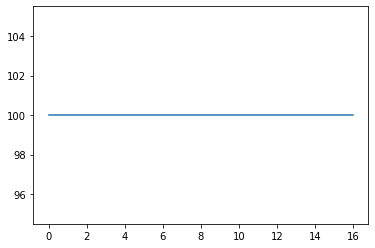

In [39]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(var1)

### Testing 

In [40]:
import os
import cv2

In [41]:
def bg_sub(filename):
    test_img_path = filename
    main_img = cv2.imread(test_img_path)
    img = cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB)
    resized_image = cv2.resize(img, (1600, 1200))
    size_y,size_x,_ = img.shape
    gs = cv2.cvtColor(resized_image,cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gs, (55,55),0)
    ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    kernel = np.ones((50,50),np.uint8)
    closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)
    
    contours, hierarchy = cv2.findContours(closing,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    
    contains = []
    y_ri,x_ri, _ = resized_image.shape
    for cc in contours:
        yn = cv2.pointPolygonTest(cc,(x_ri//2,y_ri//2),False)
        contains.append(yn)

    val = [contains.index(temp) for temp in contains if temp>0]
    index = val[0]
    
    black_img = np.empty([1200,1600,3],dtype=np.uint8)
    black_img.fill(0)
    
    cnt = contours[index]
    mask = cv2.drawContours(black_img, [cnt] , 0, (255,255,255), -1)
    
    maskedImg = cv2.bitwise_and(resized_image, mask)
    white_pix = [255,255,255]
    black_pix = [0,0,0]
    
    final_img = maskedImg
    h,w,channels = final_img.shape
    for x in range(0,w):
        for y in range(0,h):
            channels_xy = final_img[y,x]
            if all(channels_xy == black_pix):
                final_img[y,x] = white_pix
    
    return final_img

In [42]:
filename = r'C:\Users\sroy\Downloads\CNN_test\1.jpg' 
bg_rem_img = bg_sub(filename)

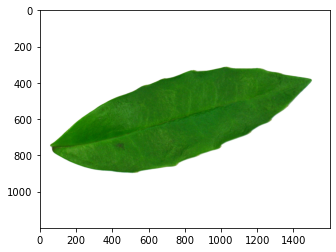

In [43]:
plt.imshow(bg_rem_img)

In [44]:
!pip install mahotas
import mahotas as mt

In [45]:
def feature_extract(imgpath):
    names = ['area','perimeter','physiological_length','physiological_width','aspect_ratio','rectangularity','circularity', \
             'mean_r','mean_g','mean_b','stddev_r','stddev_g','stddev_b', \
             'contrast','correlation','inverse_difference_moments','entropy'
            ]
    df = pd.DataFrame([], columns=names)
    print(imgpath)
    main_img = cv2.imread(imgpath)
    
    #Preprocessing
    img = cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB)
    gs = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gs, (25,25),0)
    ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    kernel = np.ones((50,50),np.uint8)
    closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)
        
    #Shape features
    contours, image = cv2.findContours(closing,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    cnt = contours[0]
    M = cv2.moments(cnt)
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt,True)
    x,y,w,h = cv2.boundingRect(cnt)
    aspect_ratio = float(w)/h
    rectangularity = w*h/area
    circularity = ((perimeter)**2)/area
        
    #Color features
    red_channel = img[:,:,0]
    green_channel = img[:,:,1]
    blue_channel = img[:,:,2]
    blue_channel[blue_channel == 255] = 0
    green_channel[green_channel == 255] = 0
    red_channel[red_channel == 255] = 0
        
    red_mean = np.mean(red_channel)
    green_mean = np.mean(green_channel)
    blue_mean = np.mean(blue_channel)
        
    red_std = np.std(red_channel)
    green_std = np.std(green_channel)
    blue_std = np.std(blue_channel)
        
    #Texture features
    textures = mt.features.haralick(gs)
    ht_mean = textures.mean(axis=0)
    contrast = ht_mean[1]
    correlation = ht_mean[2]
    inverse_diff_moments = ht_mean[4]
    entropy = ht_mean[8]
        
    vector = [area,perimeter,w,h,aspect_ratio,rectangularity,circularity,\
                  red_mean,green_mean,blue_mean,red_std,green_std,blue_std,\
                  contrast,correlation,inverse_diff_moments,entropy
                 ]
        
    df_temp = pd.DataFrame([vector],columns=names)
    df = df.append(df_temp)
    return df

# Testing classification using test images

In [59]:
img= r'C:\Users\sroy\Downloads\CNN_test\5.jpg'
features_of_img = feature_extract(img)
features_of_img

C:\Users\sroy\Downloads\CNN_test\5.jpg


,area,perimeter,physiological_length,physiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
0,1119903.5,4476.249244,1480,1110,1.333333,1.466912,17.891548,43.43513,75.447606,32.492944,46.943854,67.38619,40.281327,67.199202,0.994566,0.514096,8.107764


In [60]:
scaled_features = sc_X.transform(features_of_img)
print(scaled_features)
# y_pred_mobile = svm_clf.predict(features_of_img)
y_pred_mobile = svm_clf.predict(scaled_features)
y_pred_mobile[0]

[[ 1.96  0.96  0.69  0.98 -0.45 -0.33 -0.38  0.16  0.32  0.12  0.05 -0.12
   0.1   1.47 -1.01 -2.28  2.24]]


29

In [61]:
common_names = ['pubescent bamboo','Chinese horse chestnut','Anhui Barberry', \
                'Chinese redbud','true indigo','Japanese maple','Nanmu',' castor aralia', \
                'Chinese cinnamon','goldenrain tree','Big-fruited Holly','Japanese cheesewood', \
                'wintersweet','camphortree','Japan Arrowwood','sweet osmanthus','deodar','ginkgo, maidenhair tree', \
                'Crape myrtle, Crepe myrtle','oleander','yew plum pine','Japanese Flowering Cherry','Glossy Privet',\
                'Chinese Toon','peach','Ford Woodlotus','trident maple','Beales barberry','southern magnolia',\
                'Canadian poplar','Chinese tulip tree','tangerine'
               ]
common_names[y_pred_mobile[0]]

'Canadian poplar'

# Confusion Matrix

Confusion matrix, without normalization
[[0 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 5 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 7]]
Normalized confusion matrix
[[0.   0.   0.1  ... 0.   0.   0.  ]
 [0.   0.17 0.   ... 0.   0.   0.  ]
 [0.   0.   0.83 ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 0.5  0.   0.  ]
 [0.   0.   0.   ... 0.   0.33 0.  ]
 [0.   0.   0.   ... 0.   0.   0.78]]


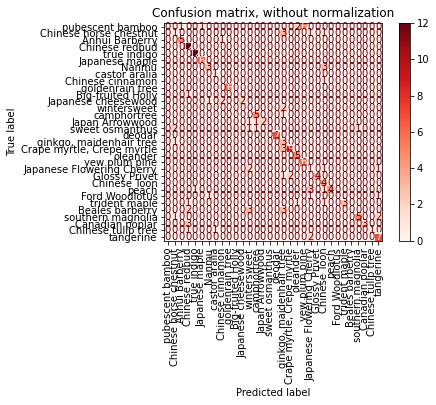

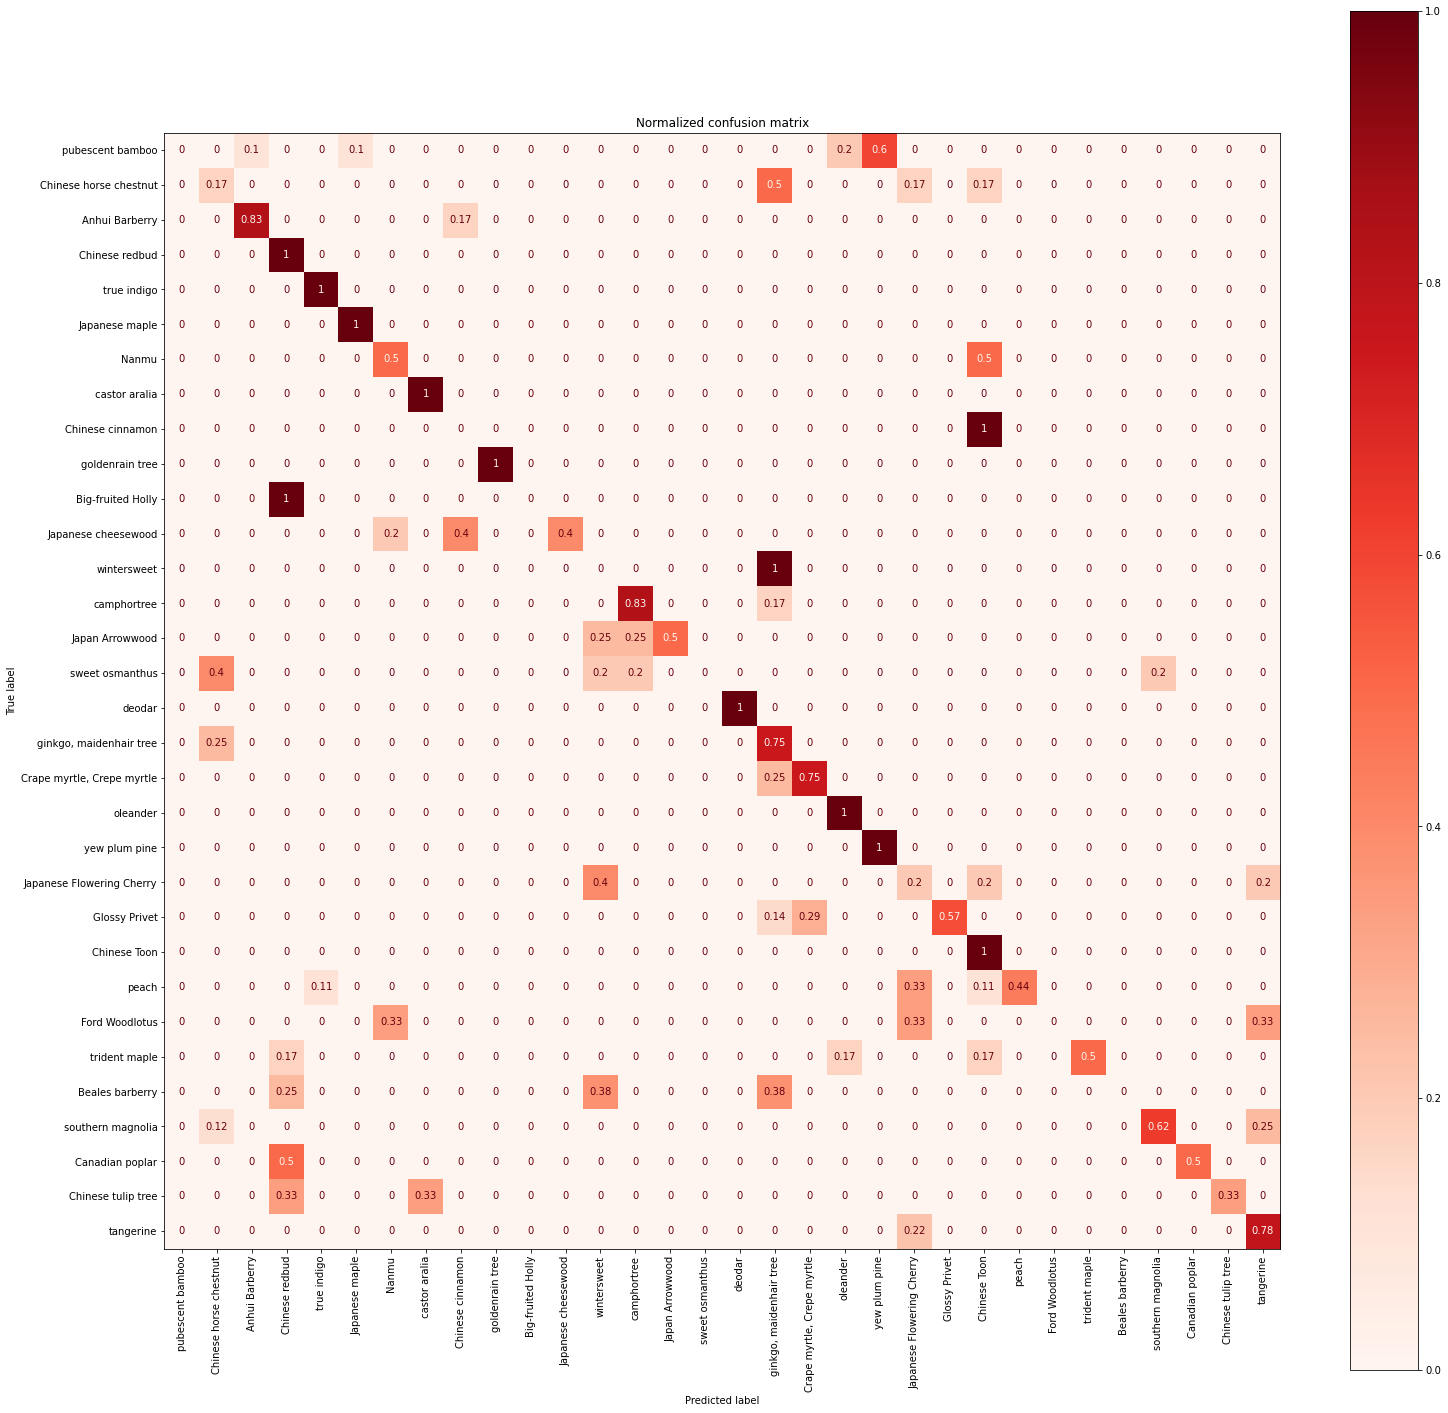

In [49]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import plot_confusion_matrix
classifier = svm.SVC(kernel='linear', C=0.01).fit(X_train, y_train)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=common_names,
                                 cmap=plt.cm.Reds,
                                 normalize=normalize)
    disp.ax_.set_title(title)
   
    print(title)
    print(disp.confusion_matrix)
    
    plt.rcParams["figure.figsize"] = (25,25)
    plt.xticks(rotation='vertical')
plt.show()